<a href="https://colab.research.google.com/github/anjaleeDS/DataVizStanford/blob/master/VegaStockData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

# web scraping for tables in read_html

# data_load = pd.read_csv()
!ls

sample_data


In [0]:
# open files from local file system - creates PROMPT
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# better way to do this is to have the data on google drive. you'll need to mount the gdrive see below



In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
#@title Default title text
# Reading from URL

data_from_web = pd.read_csv('https://raw.githubusercontent.com/cjflanagan/sample_data/master/bank.csv', sep=';')
# data_from_web
data_from_web.shape

(4521, 17)

In [0]:
# plt.legend(bbox_to_anchor=(1,1))
# to put the legend box on the side

NOTES FROM 4/21

- reviewed median, mean, Variance
- blox plots: in the box there is the MEDIAN and area is the top/bottom 25%/75% ==> comparing distribution between separate groups
- rug plot = histogram frequency by time
- violin plot = box plot with the kernel density or smoothed bar graph in one
- linear regression = (OLS) best fit line in a scatter plot. a line that creates the least variance for all points
- R-squared = how much of the variance of the Y is explained by the x axis i.e. r = 0.81 means y is 81% relation to x.
- correlation squared is R-squared
- bootstrap for bar plots = sample multiple times for multiple means results and see how. always ask for error bars!!!
- 



In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vega_datasets import data
tips_data = sns.load_dataset('tips')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
stock_data = data.stocks()
stock_data.head()
stock_data.symbol.value_counts()
############## MAGIC DATE TIME #######
pd.DatatimeIndex(msft_data.date).month

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


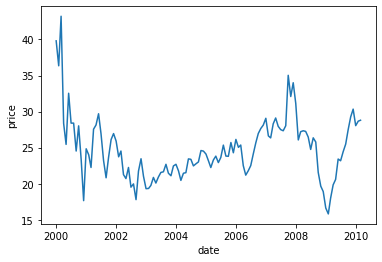

In [0]:
msft_data = stock_data[stock_data.symbol=='MSFT']
sns.lineplot(x='date', y='price', data=msft_data)


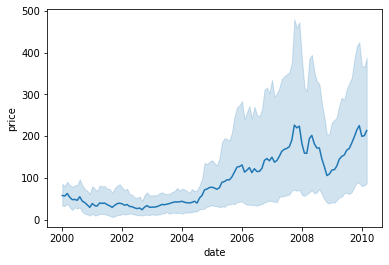

In [0]:
sns.lineplot(x='date', y='price', data=stock_data)

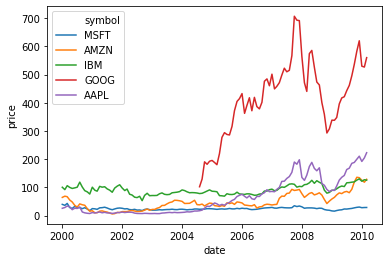

In [0]:
sns.lineplot(x='date', y='price', data=stock_data, hue='symbol')

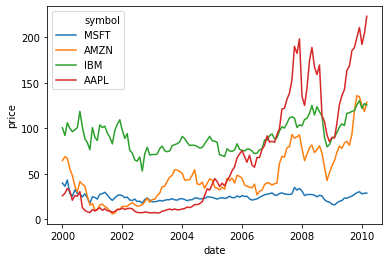

In [0]:
data_xgoog = stock_data[stock_data.symbol!= 'GOOG']
sns.lineplot(x='date', y='price', data=data_xgoog, hue='symbol')

During the bootcamp will have **pivot** and **melting** data


Data Viz for Data Science

Distributions - histograms, box-plot, violin plot
- matplotlib defaults bar charts without error bars but seaborn colors the bars AND gives the error bars
- sns.***distplot*** just takes in the data. seaborn will have line (a.k.a. KDE), bars and frequency




In [0]:
tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


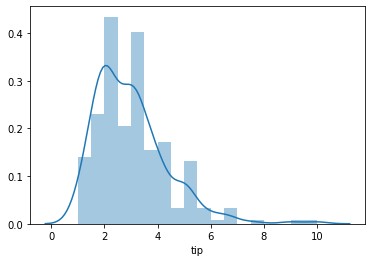

In [0]:
sns.distplot(tips_data.tip) #the line is the KDE

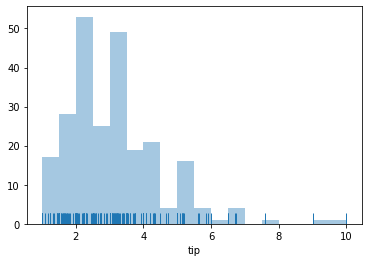

In [0]:
sns.distplot(tips_data.tip, kde=False, rug=True)

<function matplotlib.pyplot.show>

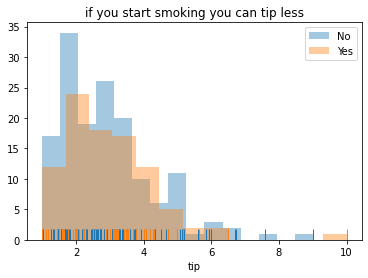

In [0]:
sns.distplot(tips_data[tips_data.smoker=='No'].tip, kde=False, rug=True, label='No')
sns.distplot(tips_data[tips_data.smoker=='Yes'].tip, kde=False, rug=True, label='Yes')
plt.legend()
plt.title('if you start smoking you can tip less')
plt.show

In [0]:
sns.distplot(tips_data[tips_data.smoker=='No'].tip, kde=False, rug=True, label='No')
sns.distplot(tips_data[tips_data.smoker=='Yes'].tip, kde=False, rug=True, label='Yes')
plt.legend()
plt.show

# Look in FBprofit on kaggle for extrapolation, particularly ***timeseries forcasting***

**- variance matters ALOT!!**
r-squared value explains the variance

LMPLOT!
- get your best fit line! regression models FTW
- y = mx+b Y is the dependent variable that we want to predict. X is the independent variable and is the data that we are using to determine Y
- confidence intervales are included in lmplot function in seaborn

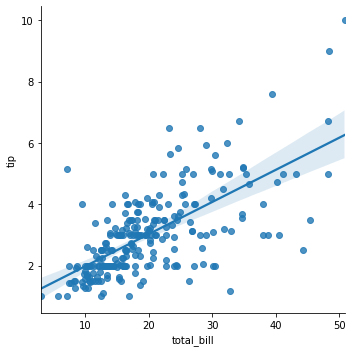

In [0]:
# Linear regression model
tips = sns.load_dataset("tips")
sns.lmplot(x="total_bill", y="tip", data=tips)

LOGISTIC REGRESSION

- it's for classification, generally a binary outcome

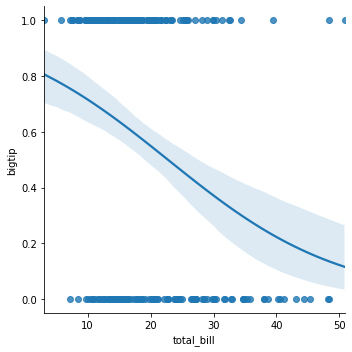

In [0]:
tips["bigtip"] = (tips.tip/tips.total_bill) > .15
sns.lmplot(x="total_bill", y="bigtip", data=tips, logistic=True)

# as the bill goes up the less likely you'll get a big tip'

# HW:

- look at live data from lending club (peer to peer lending)
- lending club selects what % of risk you want to take
- we are going to look at their *loans data*

# Question: can you predict who is going to default?!?!

In [0]:
sns.heatmap(correlation_table, annot=True)

NameError: ignored

# 04/28 notes

- using the hashlib to strongly hash PII
- hash is a one way function. function will always return the same thing when you pass in the same thing

In [0]:
import pandas as pd

#this is a weak hash
hash("blah blah blah")

7850097737398699988

In [0]:
#this is a stronger hash
import hashlib

hashlib.sha256("private keys".encode()).hexdigest()

'1ca3ed6c54169c4a586857e5b84bffb1907fd11ebc9acfdcbf7100482a68faf9'

## K anonymity

- K anonymity = if you have less than a certain number of N in a subgroup, then you need to exclude them from the group
- K = is a minimum number (N) for a group so that someone cannot figure out who the person is due to low N
, , 

1.   only store the information you need
2.   hash any PII
1.   store hash_table in a separate area
2.   use K anon practices

## barplots

- matplotlib doesn't give us error bars but seaborn does
- seaborn samples the data in each group and calculates the confidence intervals and plots them as errorbars
- errorbar overlap cancel each other out

## FiveThirtyEight

- great data viz
- https://fivethirtyeight.com/science/


## radar graphs

- convey a lot of data in a small foot print
- use sparingly because most people don't understand them
- code is in the presentation

## what is the anatomy of a figure



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

# Read data
edu_data = pd.read_csv('http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv')

edu_data.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [0]:
# findthose degrees that have low representives

edu_data.iloc[0] < 20

Year                             False
Agriculture                       True
Architecture                      True
Art and Performance              False
Biology                          False
Business                          True
Communications and Journalism    False
Computer Science                  True
Education                        False
Engineering                       True
English                          False
Foreign Languages                False
Health Professions               False
Math and Statistics              False
Physical Sciences                 True
Psychology                       False
Public Administration            False
Social Sciences and History      False
Name: 0, dtype: bool

In [0]:
under_20pct = edu_data.loc[0,edu_data.iloc[0] < 20].index
under_20pct

Index(['Agriculture', 'Architecture', 'Business', 'Computer Science',
       'Engineering', 'Physical Sciences'],
      dtype='object')

In [0]:
edu_data.plot(x='Year', y=under_20pct, figsize=(15,10))

In [0]:
style.available
style.use('fivethirtyeight')

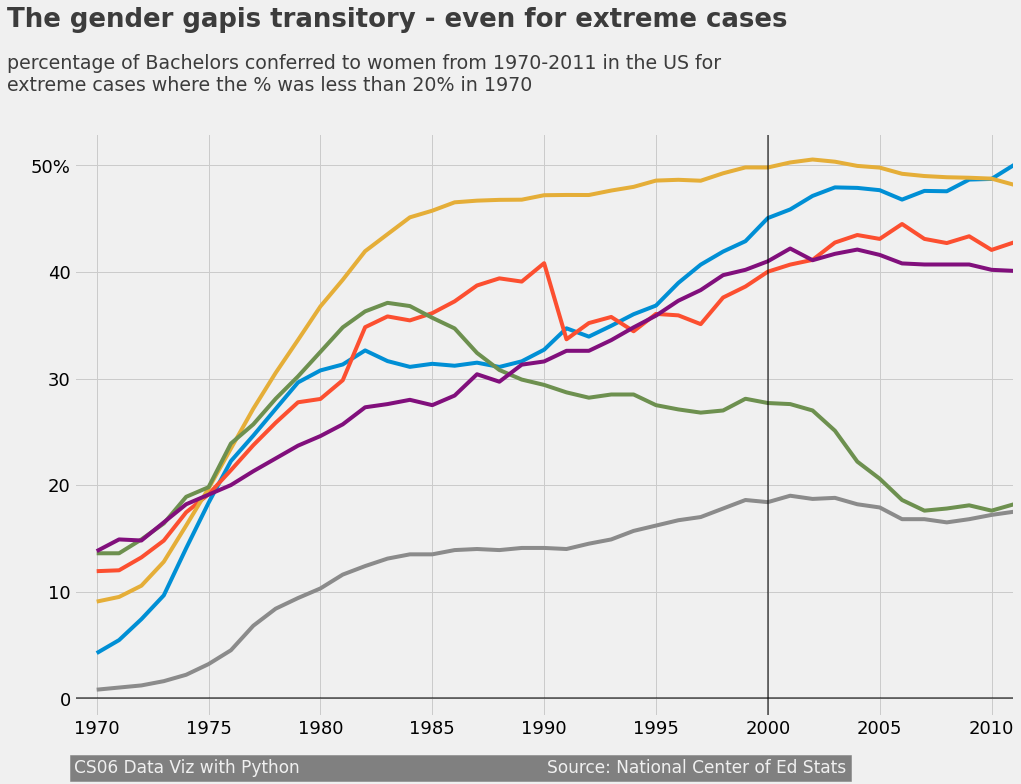

In [0]:
edu_plot = edu_data.plot(x='Year', y=under_20pct, figsize=(15,10), legend=False)

edu_plot.axhline(y=0, alpha=0.7, linewidth=1.5, color='black') # horizontal axis, alpha is opaqueness
edu_plot.axvline(x=2000, alpha=0.7, linewidth=1.5, color='black') # make a vertical line indicating an event in time

edu_plot.tick_params(axis='both', which='major', labelsize=18)
edu_plot.set_yticklabels(labels=[-10,'0', '10','20', '30', '40','50%']) 

# the -10 isn't a string because it is just used to pad spaces
edu_plot.set_xlim(left=1969, right=2011)
edu_plot.xaxis.label.set_visible(False) 

# 3 quotations below allows you to join text together without a new line
edu_plot.text(x=1969, y=-7, s="""CS06 Data Viz with Python           """ 
              + """                                   """ + 
              """Source: National Center of Ed Stats""",
              fontsize=17, color='#f0f0f0', backgroundcolor='grey')

edu_plot.text(x=1966, y=63, s='The gender gapis transitory - even for extreme cases', 
              fontsize=26, weight='bold', alpha=.75)

# byline
edu_plot.text(x=1966, y=57, s='percentage of Bachelors conferred to women from 1970-2011 in the US for \nextreme cases where the % was less than 20% in 1970', 
              fontsize=19, alpha=.75)

# turn off the legends
plt.grid()
plt.show()

In [0]:
edu_plot.axhline(y=0, alpha=0.7, linewidth=1.5, color='black') # horizontal axis, alpha is opaqueness
edu_plot.tick_params(axis='both', which='major', labelsize=18)
edu_plot.set_yticklabels(labels=[-10,'0', '10','20', '30', '40','50']) # the -10 isn't a string because it is just used to pad spaces
edu_plot.set_xlim(left=1070, right=2011)

(1070.0, 2011.0)

# Homework!

use the 538 github
- find a set of data and recreate one of their graphics by scratch
- data engineering from aws/google cloud certs are GOOD.